
## MVP Engenharia de Dados PUC-Rio

Esse Notebook tem como objetivo a coleta, modelagem, carga, tratamento e análise de dados relacionados a candidatos da área de Ciência de dados. Todas as etapas necessária para leitura do arquivo '.csv' obtido no Kaggle, tratamentos necessários para utilização dos dados, as transformações, e visualizações de gráficos e consultas SQL estão descritas abaixo para falicitar a compreenção das análises. 

O objetivo do MVP é analisar um conjunto de dados sobre informações de candidatos que buscam emprego na área de ciência de dados, função que vem sendo bastante explorada atualmente, tendo em vista as mudanças que estão ocorrendo nas empresas ao redor do mundo, que é a busca por agregar valor aos dados existentes nas mesmas. O profissional de ciência de dados entra, dessa forma, sendo umas das peças chaves para a implementação do uso inteligente desses dados para os gestores, de modo a buscar melhores resultados. 

Algumas perguntas serão respondidas a partir dos dados presentes, sendo elas divididas por cenários como mostrado abaixo: 
1.	Perfil dos profissionais:
•	Qual a distribuição de gênero dos candidatos?
•	Qual o nível de formação mais comum entre os profissionais de ciência de dados?
•	Qual a experiência média dos candidatos?
•	Quantas pessoas já têm experiência relevante na área?

2.	Fatores que Impactam a Contratação
•	O nível de educação influencia na intenção de trocar de emprego?
•	Candidatos que fizeram mais horas de treinamento têm mais chances de mudar de emprego?
•	Qual o impacto do tamanho da empresa na retenção de talentos?
•	Empresas privadas (Pvt Ltd) perdem mais funcionários do que startups?

3.	Localização e Desenvolvimento do Mercado
•	Em quais cidades há maior concentração de profissionais de ciência de dados?
•	O índice de desenvolvimento da cidade (city_development_index) tem impacto na retenção de talentos?

4.	Análises sobre Empresas
•	Qual o porte das empresas que mais contratam profissionais de ciência de dados?
•	Startups contratam mais profissionais juniores ou seniores?
•	Empresas grandes (5000+ funcionários) investem mais em treinamento do que empresas pequenas?


In [0]:
dbutils.fs.ls('dbfs:/FileStore/tables/')

Out[1]: [FileInfo(path='dbfs:/FileStore/tables/data_science_job.csv', name='data_science_job.csv', size=1909540, modificationTime=1742415019000)]

In [0]:
# Localização do arquivo e o tipo
file_location = "/FileStore/tables/data_science_job.csv"
file_type = "csv"

# Opções para leitura do arquivo CSV
infer_schema = "true"
first_row_is_header = "true"
delimiter = ","

# Leitura do arquivo CSV de acordo com as especificações para coleta correta dos dados
df = spark.read.format(file_type) \
  .option("inferSchema", infer_schema) \
  .option("header", first_row_is_header) \
  .option("sep", delimiter) \
  .load(file_location)

# Lendo as primeiras 10 linhas do DataFrame
display(df.head(10))


enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,training_hours,target
8949,city_103,0.92,Male,Has relevent experience,no_enrollment,Graduate,STEM,20,null,null,36.0,1.0
29725,city_40,0.7759999999999999,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,47.0,0.0
11561,city_21,0.624,null,No relevent experience,Full time course,Graduate,STEM,5,null,null,83.0,0.0
33241,city_115,0.789,null,No relevent experience,null,Graduate,Business Degree,0,null,Pvt Ltd,52.0,1.0
666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,20,50-99,Funded Startup,8.0,0.0
21651,city_176,0.764,null,Has relevent experience,Part time course,Graduate,STEM,11,null,null,24.0,1.0
28806,city_160,0.92,Male,Has relevent experience,no_enrollment,High School,null,5,50-99,Funded Startup,24.0,0.0
402,city_46,0.762,Male,Has relevent experience,no_enrollment,Graduate,STEM,13,<10,Pvt Ltd,18.0,1.0
27107,city_103,0.92,Male,Has relevent experience,no_enrollment,Graduate,STEM,7,50-99,Pvt Ltd,46.0,1.0
699,city_103,0.92,null,Has relevent experience,no_enrollment,Graduate,STEM,17,10000+,Pvt Ltd,123.0,0.0


Algumas transformações podem ser feitas para melhorar a qualidade dos dados, como: 
- Remover possíveis valores duplicados;
- Identificar e tratar valores faltantes para melhorar a qualidade das análises posteriores;
- Criação de colunas derivadas das já existentes na tabela para agregar nas análises posteriores.

In [0]:
# Remoção de valores duplicados
df = df.dropDuplicates()


In [0]:
#Importação de bibliotecas necessárias
from pyspark.sql.functions import col, sum

# Contar valores nulos em cada coluna
missing_counts = df.select([sum(col(c).isNull().cast("int")).alias(c) for c in df.columns])

# Converterção para Pandas para melhor visualização dos valores faltantes
missing_counts.toPandas().T.rename(columns={0: "Valores Faltantes"})


,Valores Faltantes
enrollee_id,0
city,0
city_development_index,479
gender,4508
relevent_experience,0
enrolled_university,386
education_level,460
major_discipline,2813
experience,65
company_size,5938


In [0]:
# Lendo as primeiras 10 linhas do DataFrame
display(df.head(10))


enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,training_hours,target
8949,city_103,0.92,Male,Has relevent experience,no_enrollment,Graduate,STEM,20,null,null,36.0,1.0
29725,city_40,0.7759999999999999,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,47.0,0.0
11561,city_21,0.624,null,No relevent experience,Full time course,Graduate,STEM,5,null,null,83.0,0.0
33241,city_115,0.789,null,No relevent experience,null,Graduate,Business Degree,0,null,Pvt Ltd,52.0,1.0
666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,20,50-99,Funded Startup,8.0,0.0
21651,city_176,0.764,null,Has relevent experience,Part time course,Graduate,STEM,11,null,null,24.0,1.0
28806,city_160,0.92,Male,Has relevent experience,no_enrollment,High School,null,5,50-99,Funded Startup,24.0,0.0
402,city_46,0.762,Male,Has relevent experience,no_enrollment,Graduate,STEM,13,<10,Pvt Ltd,18.0,1.0
27107,city_103,0.92,Male,Has relevent experience,no_enrollment,Graduate,STEM,7,50-99,Pvt Ltd,46.0,1.0
699,city_103,0.92,null,Has relevent experience,no_enrollment,Graduate,STEM,17,10000+,Pvt Ltd,123.0,0.0


In [0]:
#Importação de bibliotecas necessárias
from pyspark.sql.functions import col, lit
from pyspark.sql import functions as F

# Criação de uma coluna que represente os grupos de acordo com os anos de experiencia dos candidatos
df = df.withColumn("experience_group", 
                   F.when(col("experience") < 3, "Júnior")
                   .when((col("experience") >= 3) & (col("experience") < 6), "Pleno")
                   .otherwise("Sênior"))


Visando a modelagem dos dados em forma estrela, a qual será feita a criação das tabelas dimensão e fato, é importante que as chaves primarias de todas essas tabelas sejam valores numéricos. Desse modo, a celula abaixo faz a extração da fração 'string' da coluna 'city', para que apenas os valores numéricos permaneçam e possam ser usados como o identificador único de cada cidade na tabela dim_city.

In [0]:
#Importar bibliotecas necessárias
from pyspark.sql.functions import regexp_extract, col

# Selecionando a coluna 'city', removendo a fração string, e mantendo apenas os valores numéricos em uma nova coluna 'city_id'
df = df.withColumn("city_id", regexp_extract(col("city"), r"(\d+)", 1))

# Convertendo a coluna criada (city_id) para inteiro
df = df.withColumn("city_id", col("city_id").cast("int"))

#Removendo a coluna original (city)
df = df.withColumn("city", col("city_id")).drop("city")

# Exibir os dados transformados
display(df.head(10))



enrollee_id,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,training_hours,target,city_id
8949,0.92,Male,Has relevent experience,no_enrollment,Graduate,STEM,20,null,null,36.0,1.0,103
29725,0.7759999999999999,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,47.0,0.0,40
11561,0.624,null,No relevent experience,Full time course,Graduate,STEM,5,null,null,83.0,0.0,21
33241,0.789,null,No relevent experience,null,Graduate,Business Degree,0,null,Pvt Ltd,52.0,1.0,115
666,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,20,50-99,Funded Startup,8.0,0.0,162
21651,0.764,null,Has relevent experience,Part time course,Graduate,STEM,11,null,null,24.0,1.0,176
28806,0.92,Male,Has relevent experience,no_enrollment,High School,null,5,50-99,Funded Startup,24.0,0.0,160
402,0.762,Male,Has relevent experience,no_enrollment,Graduate,STEM,13,<10,Pvt Ltd,18.0,1.0,46
27107,0.92,Male,Has relevent experience,no_enrollment,Graduate,STEM,7,50-99,Pvt Ltd,46.0,1.0,103
699,0.92,null,Has relevent experience,no_enrollment,Graduate,STEM,17,10000+,Pvt Ltd,123.0,0.0,103


Os valores nulos presentes em cada coluna serão tratados de acordo com as particulariedades de cada coluna. Abaixo estão as substituições propostas para eliminar os valores nulos. 

In [0]:
# Importar bibliotecas necessárias
from pyspark.sql.functions import col, lit
from pyspark.sql import functions as F

# 1. Substituir valores nulos da coluna city_development_index pela mediana
median_cdi = df.approxQuantile("city_development_index", [0.5], 0.01)[0]
df = df.fillna({"city_development_index": median_cdi})

# 2. Preencher valores nulos de gender com "Not informed"
df = df.fillna({"gender": "Not informed"})

# 3. Preencher valores nulos de enrolled_university com "Not informed"
df = df.fillna({"enrolled_university":  "Not informed"})

# 4. Preencher valores nulos de education_level com a moda
mode_education_level = df.groupby("education_level").count().orderBy(F.desc("count")).first()[0]
df = df.fillna({"education_level": mode_education_level})

# 5. Preencher valores nulos de major_discipline com "Not informed"
df = df.fillna({"major_discipline": "Not informed"})

# 6. Substituir valores nulos de experience pela mediana
median_experience = df.approxQuantile("experience", [0.5], 0.01)[0]
df = df.fillna({"experience": median_experience})

# 7. Preencher valores nulos de company_size com "Not informed"
df = df.fillna({"company_size":  "Not informed"})

# 8. Preencher valores nulos de company_type com "Not informed"
df = df.fillna({"company_type":  "Not informed"})

# 9. Substituir valores nulos de training_hours pela mediana
median_training_hours = df.approxQuantile("training_hours", [0.5], 0.01)[0]
df = df.fillna({"training_hours": median_training_hours})

# Criar uma tabela no Databricks para consultas SQL
df.createOrReplaceTempView("data_science_jobs")

# Salvar a tabela no DBFS
dbutils.fs.rm("dbfs:/user/hive/warehouse/data_science_jobs_table", True)
df.write.mode("overwrite").saveAsTable("data_science_jobs_table")

# Lendo as primeiras 10 linhas do DataFrame
display(df.head(10))



enrollee_id,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,training_hours,target,city_id
8949,0.92,Male,Has relevent experience,no_enrollment,Graduate,STEM,20,Not informed,Not informed,36.0,1.0,103
29725,0.7759999999999999,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,47.0,0.0,40
11561,0.624,Not informed,No relevent experience,Full time course,Graduate,STEM,5,Not informed,Not informed,83.0,0.0,21
33241,0.789,Not informed,No relevent experience,Not informed,Graduate,Business Degree,0,Not informed,Pvt Ltd,52.0,1.0,115
666,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,20,50-99,Funded Startup,8.0,0.0,162
21651,0.764,Not informed,Has relevent experience,Part time course,Graduate,STEM,11,Not informed,Not informed,24.0,1.0,176
28806,0.92,Male,Has relevent experience,no_enrollment,High School,Not informed,5,50-99,Funded Startup,24.0,0.0,160
402,0.762,Male,Has relevent experience,no_enrollment,Graduate,STEM,13,<10,Pvt Ltd,18.0,1.0,46
27107,0.92,Male,Has relevent experience,no_enrollment,Graduate,STEM,7,50-99,Pvt Ltd,46.0,1.0,103
699,0.92,Not informed,Has relevent experience,no_enrollment,Graduate,STEM,17,10000+,Pvt Ltd,123.0,0.0,103


In [0]:
# Exibição do Schema da tabela para verificar se necessita converter o tipo de alguma coluna
df.printSchema()


root
 |-- enrollee_id: integer (nullable = true)
 |-- city_development_index: double (nullable = false)
 |-- gender: string (nullable = false)
 |-- relevent_experience: string (nullable = true)
 |-- enrolled_university: string (nullable = false)
 |-- education_level: string (nullable = false)
 |-- major_discipline: string (nullable = false)
 |-- experience: integer (nullable = true)
 |-- company_size: string (nullable = false)
 |-- company_type: string (nullable = false)
 |-- training_hours: double (nullable = false)
 |-- target: double (nullable = true)
 |-- experience_group: string (nullable = false)
 |-- city_id: integer (nullable = true)



# Análises gráficas

Após as tranformações dos dados, considerando a tabela tratada, a construção de gráficos pode trazer um maior conhecimento para os mesmos, pois pode-se visualizar a distribuição das variáveis entre si. Gráficos ajudam a condensar grandes volumes de dados em uma representação visual simples e intuitiva, facilitando a compreensão. Em muitos casos, as decisões não são tomadas com base apenas em números brutos, com isso os gráficos tornam os dados mais acessíveis e compreensíveis para pessoas que não são especialistas em análise de dados, como executivos ou gestores, ajudando a comparar diferentes grupos de dados de forma visual, facilitando a identificação das diferenças e apoiando a tomada de decisão.

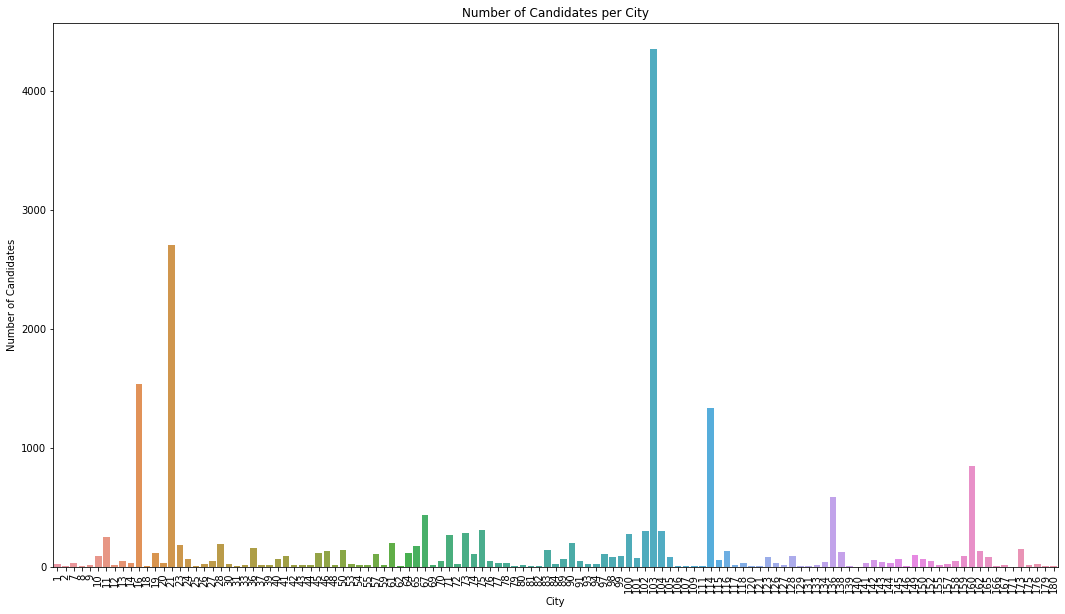

In [0]:
#Importação de bibliotecas necessárias
import matplotlib.pyplot as plt
import seaborn as sns

#Criação do gráfico para visualizar o numero de candidatos por cidade
city_counts = df.groupBy('city_id').count().orderBy('count', ascending=False)
city_counts_df = city_counts.toPandas()  # Converter para Pandas para visualização
plt.figure(figsize=(18, 10))
sns.barplot(x='city_id', y='count', data=city_counts_df)
plt.xticks(rotation=90)
plt.title('Number of Candidates per City')
plt.xlabel('City')
plt.ylabel('Number of Candidates')
plt.show()


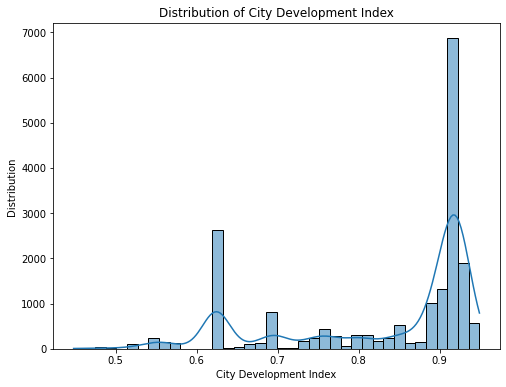

In [0]:
# Criação do histograma para mostrar a distribuição do indice de desenvolvimento das cidades presentes no dataset
city_dev_index_df = df.select('city_development_index').toPandas()  # Convertendo para Pandas
plt.figure(figsize=(8, 6))
sns.histplot(city_dev_index_df['city_development_index'], kde=True)
plt.title('Distribution of City Development Index')
plt.xlabel('City Development Index')
plt.ylabel('Distribution')
plt.show()


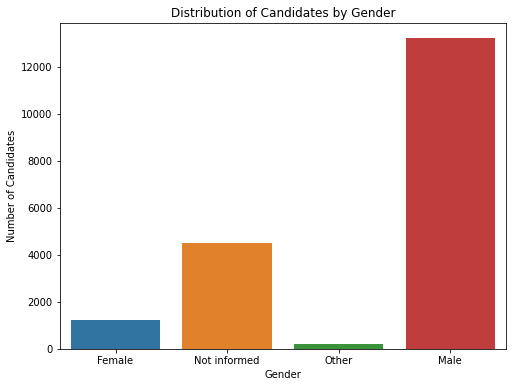

In [0]:
# Criação do gráfico que avalia a distribuição dos gráficos de acordo com o gênero informado pelos mesmos
gender_counts = df.groupBy('gender').count()
gender_counts_df = gender_counts.toPandas()  # Converter para Pandas para visualização
plt.figure(figsize=(8, 6))
sns.barplot(x='gender', y='count', data=gender_counts_df)
plt.title('Distribution of Candidates by Gender')
plt.xlabel('Gender')
plt.ylabel('Number of Candidates')
plt.show()


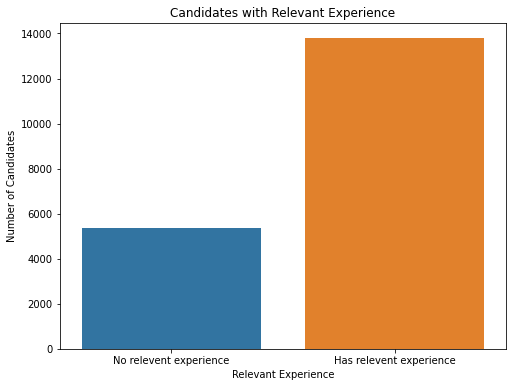

In [0]:
# Criação de gráfico de distribuição da quantidade de candidatos com experiencia relevante em Ciência de dados
relevant_experience_counts = df.groupBy('relevent_experience').count()
relevant_experience_counts_df = relevant_experience_counts.toPandas()
plt.figure(figsize=(8, 6))
sns.barplot(x='relevent_experience', y='count', data=relevant_experience_counts_df)
plt.title('Candidates with Relevant Experience')
plt.xlabel('Relevant Experience')
plt.ylabel('Number of Candidates')
plt.show()


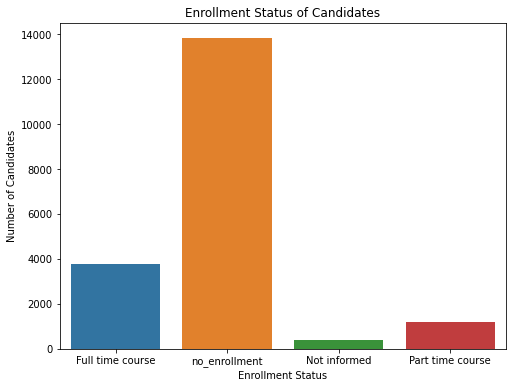

In [0]:
# Criação de gráfico que apresenta a distribuição dos candidatos de acordo com o status de matrícula 
enrollment_status_counts = df.groupBy('enrolled_university').count()
enrollment_status_counts_df = enrollment_status_counts.toPandas()
plt.figure(figsize=(8, 6))
sns.barplot(x='enrolled_university', y='count', data=enrollment_status_counts_df)
plt.title('Enrollment Status of Candidates')
plt.xlabel('Enrollment Status')
plt.ylabel('Number of Candidates')
plt.show()


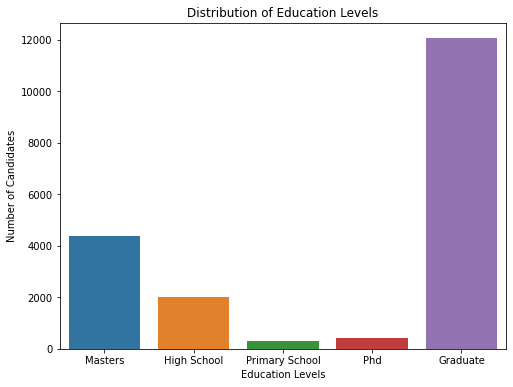

In [0]:
# Criação do gráfico que mostre a distribuição dos candidatos pelo nível de educação
education_level_counts = df.groupBy('education_level').count()
education_level_counts_df = education_level_counts.toPandas()
plt.figure(figsize=(8, 6))
sns.barplot(x='education_level', y='count', data=education_level_counts_df)
plt.title('Distribution of Education Levels')
plt.xlabel('Education Levels')
plt.ylabel('Number of Candidates')
plt.show()


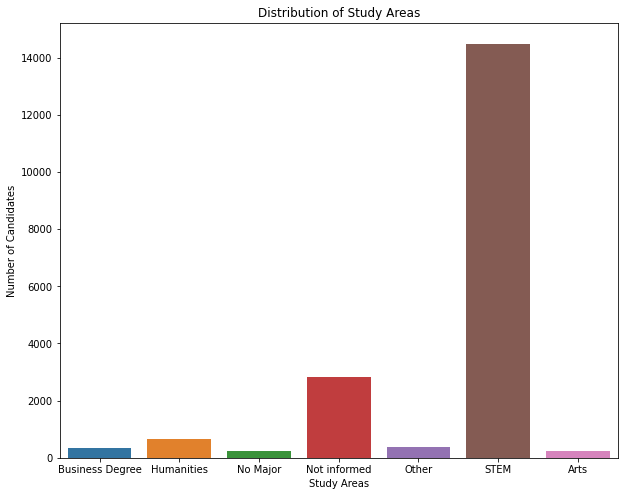

In [0]:
# Criação do gráfico que mostre a distribuição dos candidatos pela área de estudos
major_counts = df.groupBy('major_discipline').count()
major_counts_df = major_counts.toPandas()
plt.figure(figsize=(10, 8))
sns.barplot(x='major_discipline', y='count', data=major_counts_df)
plt.title('Distribution of Study Areas')
plt.xlabel('Study Areas')
plt.ylabel('Number of Candidates')
plt.show()


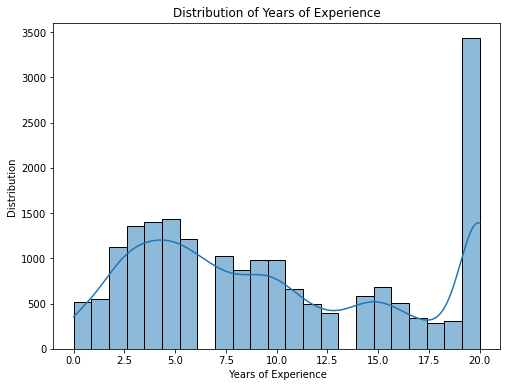

In [0]:
# Criação do gráfico que mostre a distribuição dos anos de experiencia em Ciência de dados
experience_df = df.select('experience').toPandas()
plt.figure(figsize=(8, 6))
sns.histplot(experience_df['experience'], kde=True)
plt.title('Distribution of Years of Experience')
plt.xlabel(' Years of Experience')
plt.ylabel('Distribution')
plt.show()


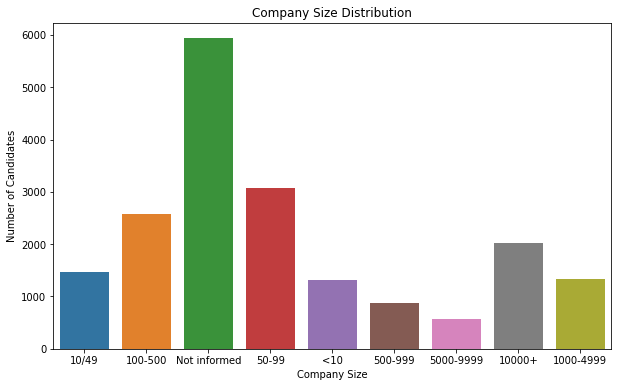

In [0]:
# Criação do gráfico para distribuição dos candidatos em relação do tamanho da empresa
company_size_counts = df.groupBy('company_size').count()
company_size_counts_df = company_size_counts.toPandas()
plt.figure(figsize=(10, 6))
sns.barplot(x='company_size', y='count', data=company_size_counts_df)
plt.title('Company Size Distribution')
plt.xlabel('Company Size')
plt.ylabel('Number of Candidates')
plt.show()


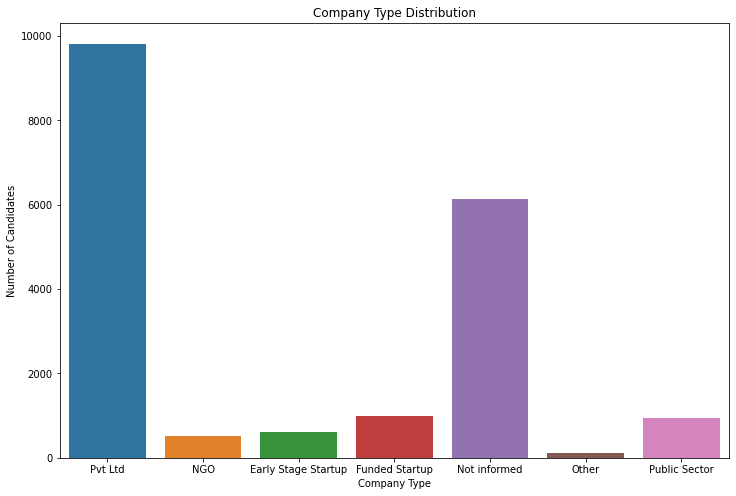

In [0]:
# Criação do gráfico para distribuição dos candidatos em relação ao tipo da empresa
company_type_counts = df.groupBy('company_type').count()
company_type_counts_df = company_type_counts.toPandas()
plt.figure(figsize=(12, 8))
sns.barplot(x='company_type', y='count', data=company_type_counts_df)
plt.title('Company Type Distribution')
plt.xlabel('Company Type')
plt.ylabel('Number of Candidates')
plt.show()


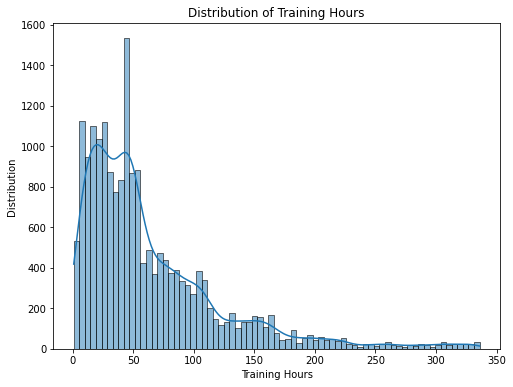

In [0]:
# Criação do gráfico para distribuição das horas de treinamento dos candidatos
training_hours_df = df.select('training_hours').toPandas()
plt.figure(figsize=(8, 6))
sns.histplot(training_hours_df['training_hours'], kde=True)
plt.title('Distribution of Training Hours')
plt.xlabel('Training Hours')
plt.ylabel('Distribution')
plt.show()


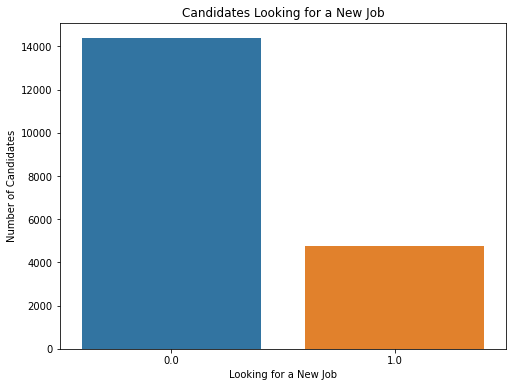

In [0]:
# Criação do gráfico para a variável target para Candidatos que estão a procura de emprego ou não
target_counts = df.groupBy('target').count()
target_counts_df = target_counts.toPandas()
plt.figure(figsize=(8, 6))
sns.barplot(x='target', y='count', data=target_counts_df)
plt.title('Candidates Looking for a New Job')
plt.xlabel('Looking for a New Job')
plt.ylabel('Number of Candidates')
plt.show()


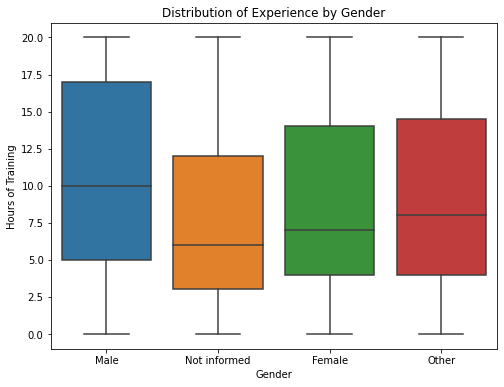

In [0]:
# Boxplot para 'experiência' por 'gênero' para identificar outliers nas variáveis analisadas
plt.figure(figsize=(8, 6))
sns.boxplot(x='gender', y='experience', data=df.toPandas())
plt.title('Distribution of Experience by Gender')
plt.xlabel('Gender')
plt.ylabel('Hours of Training')
plt.show()



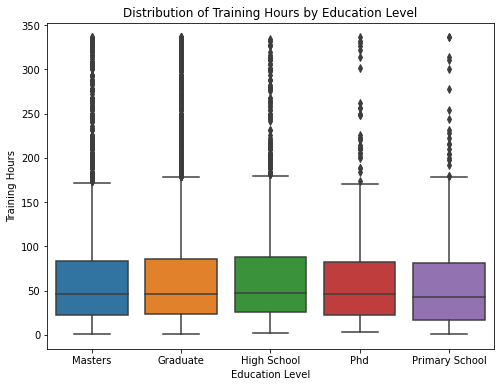

In [0]:
# Boxplot para 'training_hours' por 'education_level' para identificar outliers nas variáveis analisadas
plt.figure(figsize=(8, 6))
sns.boxplot(x='education_level', y='training_hours', data=df.toPandas())
plt.title('Distribution of Training Hours by Education Level')
plt.xlabel('Education Level')
plt.ylabel('Training Hours')
plt.show()

Com o Boxplot anterior pode-se verificar que distribuição das horas de treinamento entre os diferentes níveis de educação dos candidatos são proximas, e todos os níveis possuem pontos outliers, mostrando que, apesar do níve, tem candidatos que buscam por mais horas de treinamento do que a média.

## Matriz de correlação
Durante a análise exploratória de dados (EDA), a matriz de correlação oferece uma visão geral das interações entre variáveis, ajudando analistas a identificar padrões e relações. Ela pode ser usada para descobrir quais variáveis estão mais fortemente associadas entre si, oferecendo pistas sobre possíveis relações causais ou sobre o comportamento geral dos dados. Sua principal função é mostrar o grau de associação linear entre diferentes variáveis. 

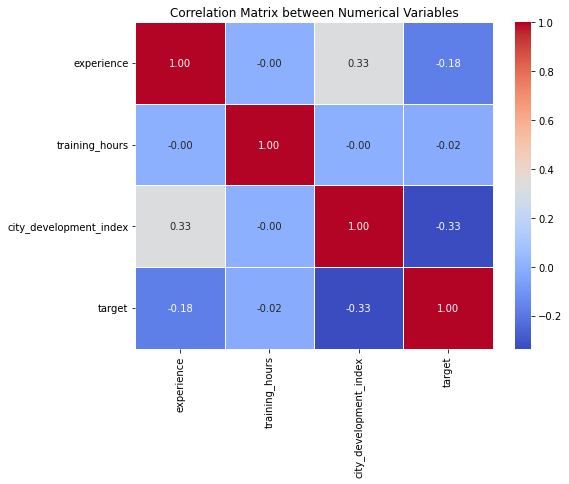

In [0]:
# Calculando a matriz de correlação
correlation_matrix = df.select('experience', 'training_hours', 'city_development_index', 'target').toPandas().corr()

# Heatmap de correlação
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix between Numerical Variables')
plt.show()


A matriz de correlação anterior mostra que as variáveis não possuem  ou possui uma fraca correlação entre si, não acrescentando informações na análise dos dados.

# Comandos SQL para consultar as tabelas criadas
Após a análise gráfica, pode-se fazer a criação das tabela fato e dimensão relacionadas ao problema. 
A tabela original, após os tratamentos, foi nomeada como 'data_science_jobs_table', ficando disponível para consultas na linguagem SQL. A partir dela, será feito a criação das tabelas:
- dim_city;
- dim_company;
- dim_professional;
- fact_jobs.

Após a criação dessas tabelas, as consultas em SQL serão feitas para responder os questionamentos propostos nos objetivos do MVP.

In [0]:
%sql
SELECT * FROM data_science_jobs_table LIMIT 10;


enrollee_id,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,training_hours,target,experience_group,city_id
25766,0.884,Male,No relevent experience,Full time course,Masters,STEM,14,100-500,Public Sector,96.0,0.0,Sênior,71
29288,0.624,Male,No relevent experience,no_enrollment,Graduate,STEM,3,500-999,Pvt Ltd,11.0,1.0,Pleno,21
24937,0.624,Male,Has relevent experience,Full time course,Graduate,STEM,4,50-99,Pvt Ltd,198.0,1.0,Pleno,21
16796,0.92,Male,Has relevent experience,no_enrollment,Graduate,STEM,16,1000-4999,Pvt Ltd,54.0,0.0,Sênior,103
26423,0.91,Not informed,Has relevent experience,no_enrollment,Graduate,STEM,6,Not informed,Not informed,4.0,0.0,Sênior,16
9305,0.722,Male,Has relevent experience,no_enrollment,Graduate,STEM,11,10/49,Pvt Ltd,91.0,0.0,Sênior,118
10615,0.738,Male,Has relevent experience,no_enrollment,Graduate,STEM,14,1000-4999,Pvt Ltd,29.0,1.0,Sênior,123
10996,0.91,Male,Has relevent experience,no_enrollment,Graduate,STEM,12,50-99,Pvt Ltd,96.0,0.0,Sênior,16
5901,0.7659999999999999,Not informed,Has relevent experience,no_enrollment,Graduate,STEM,6,1000-4999,Pvt Ltd,33.0,0.0,Sênior,158
19507,0.698,Male,No relevent experience,no_enrollment,High School,Not informed,3,Not informed,Not informed,96.0,0.0,Pleno,152


In [0]:
%sql
SELECT COUNT(*) FROM data_science_jobs_table;

count(1)
19158


In [0]:
# Remoçaõ das tabelas presentes no hive para não ter conflito na criação das tabelas posteriores
dbutils.fs.rm("dbfs:/user/hive/warehouse/dim_professional", True)
dbutils.fs.rm("dbfs:/user/hive/warehouse/dim_city", True)
dbutils.fs.rm("dbfs:/user/hive/warehouse/dim_company", True)
dbutils.fs.rm("dbfs:/user/hive/warehouse/fact_jobs", True)
dbutils.fs.rm("dbfs:/user/hive/warehouse/data_science_jobs_table1", True)
dbutils.fs.rm("dbfs:/user/hive/warehouse/data_science_jobs_table2", True)


Out[27]: False

In [0]:
dbutils.fs.ls("dbfs:/user/hive/warehouse")


Out[28]: [FileInfo(path='dbfs:/user/hive/warehouse/data_science_jobs_cleaned/', name='data_science_jobs_cleaned/', size=0, modificationTime=0),
 FileInfo(path='dbfs:/user/hive/warehouse/data_science_jobs_cleaned2/', name='data_science_jobs_cleaned2/', size=0, modificationTime=0),
 FileInfo(path='dbfs:/user/hive/warehouse/data_science_jobs_table/', name='data_science_jobs_table/', size=0, modificationTime=0)]

Algumas consultas prévias serão feitas sobre as variáveis que serão usadas para criar as tabela fato e dimensão para verificar se existe alguma inconsistencia nos dados a ser corrigida antes dessa etapa.

In [0]:
%sql
SELECT DISTINCT city_id, city_development_index
FROM data_science_jobs_table
ORDER BY city_id ASC;

city_id,city_development_index
1,0.847
2,0.7879999999999999
2,0.899
7,0.647
8,0.698
9,0.743
10,0.899
10,0.895
11,0.55
11,0.899


A consulta anterior mostra que existem valores diferentes de indice de desenvolvimento de cidades com o mesmo id, fazendo com que a informação fique duplicada. Dessa forma, precisa ser feito um tratamento sobre essa variável. 

In [0]:
%sql
SELECT DISTINCT enrollee_id, education_level, gender, experience, major_discipline, relevent_experience, experience_group 
FROM data_science_jobs_table
ORDER BY enrollee_id ASC
LIMIT 10;

enrollee_id,education_level,gender,experience,major_discipline,relevent_experience,experience_group
1,High School,Male,2,Not informed,No relevent experience,Júnior
2,Phd,Male,15,STEM,No relevent experience,Sênior
4,Masters,Male,9,STEM,No relevent experience,Sênior
5,Masters,Male,10,STEM,Has relevent experience,Sênior
7,Masters,Male,13,STEM,Has relevent experience,Sênior
8,Graduate,Female,13,Humanities,No relevent experience,Sênior
9,Graduate,Male,20,STEM,Has relevent experience,Sênior
10,Graduate,Female,15,STEM,Has relevent experience,Sênior
11,Primary School,Male,11,Not informed,Has relevent experience,Sênior
13,Graduate,Male,20,STEM,Has relevent experience,Sênior


In [0]:
%sql
SELECT DISTINCT company_size, company_type
FROM data_science_jobs_table
LIMIT 10;

company_size,company_type
<10,Not informed
10000+,Public Sector
Not informed,Pvt Ltd
100-500,Early Stage Startup
10/49,Not informed
50-99,Other
500-999,Public Sector
5000-9999,NGO
5000-9999,Public Sector
Not informed,Other


A criação da tabela dim_city será feita com os id criados no tratamento da tabela original, cosiderando apenas a média do indice de desenvolvimento das cidades que possuiam mais de um valor para essa variável. As colunas usadas são 'city_id' e 'city_development_index'.

In [0]:
%sql
CREATE TABLE dim_city
USING DELTA
AS 
SELECT DISTINCT
    city_id as id_city, 
    ROUND(AVG(city_development_index), 3) AS city_development_index
FROM data_science_jobs_table
GROUP BY city_id;


num_affected_rows,num_inserted_rows


In [0]:
%sql
SELECT * 
FROM dim_city 
ORDER BY id_city ASC
LIMIT 10;

id_city,city_development_index
1,0.847
2,0.804
7,0.647
8,0.698
9,0.743
10,0.895
11,0.553
12,0.68
13,0.832
14,0.698


A criação da tabela dim_company será feita com as colunas 'company_size' e 'company_type' da tabela original. Como essas colunas não possuem uma identificação única, podendo ter valores repetidos, foi feito a criação de um identificador único para os registros dessa tabela. 

In [0]:
%sql
CREATE TABLE dim_company (
    id_company BIGINT GENERATED ALWAYS AS IDENTITY,
    company_size STRING,
    company_type STRING
);

-- Inserir os dados sem a coluna de identidade
INSERT INTO dim_company (company_size, company_type)
SELECT DISTINCT company_size, company_type FROM data_science_jobs_table;



num_affected_rows,num_inserted_rows
57,57


In [0]:
%sql
SELECT id_company
FROM dim_company
ORDER BY id_company ASC
LIMIT 10;

id_company
1
2
3
4
5
6
7
8
9
10


A criação da tabela dim_professional é feita considerando as colunas 'enrollee_id', 'education_level', 'gender', 'major_discipline', 'experience', 'relevent_experience' e 'experience_group'. A coluna enrollee_id é a chave primária dessa tabela, renomeada de id_professional.

In [0]:
%sql
CREATE TABLE dim_professional AS 
SELECT DISTINCT 
    enrollee_id AS id_professional,
    education_level,
    gender,
    major_discipline,
    experience,
    relevent_experience,
    experience_group
FROM data_science_jobs_table;


num_affected_rows,num_inserted_rows


In [0]:
%sql
SELECT id_professional
FROM dim_professional
ORDER BY id_professional ASC
LIMIT 10;

id_professional
1
2
4
5
7
8
9
10
11
13


In [0]:
# Contar total de registros na tabela
total_rows = spark.table("data_science_jobs_table").count()
print(f"Total de registros: {total_rows}")


Total de registros: 19158


Para facilitar a inserção dos dados da tabela orignal na tabela fato que será criada, a mesma foi dividida em duas partes para não sobrecarregar o Cluster criado na plataforma, visto que há limitações na ferramenta por ser para estudos e gratuita.

In [0]:
# Carregar a tabela como DataFrame do PySpark
df_cleaned = spark.table("data_science_jobs_table")

# Dividir em duas partes (50% cada)
df_part1, df_part2 = df_cleaned.randomSplit([0.5, 0.5], seed=42)

# Salvar as partes como arquivos Parquet temporários
df_part1.write.mode("overwrite").parquet("/mnt/data/data_science_part1")
df_part2.write.mode("overwrite").parquet("/mnt/data/data_science_part2")


In [0]:
%sql
CREATE TABLE data_science_jobs_part1
USING PARQUET
LOCATION '/mnt/data/data_science_part1';

CREATE TABLE data_science_jobs_part2
USING PARQUET
LOCATION '/mnt/data/data_science_part2';


A criação da tabela fato será feita considerando:
- Não há uma coluna identificadora, por isso a coluna id_fato será criada para identificar cada registro unicamente;
- As colunas id_professional, id_company e id_city são chaves estrangeiras oriundas das tabelas dim_professional, dim_company e dim_city, respectivamente. Para que posteiormente seja possível fazer consulta relacionando essas tabelas com a tabela fato;
- As colunas 'training_hours' e 'target' são as métricas oriundas da tabela original.

In [0]:
%sql
CREATE TABLE IF NOT EXISTS fact_jobs (
    id_fato BIGINT GENERATED ALWAYS AS IDENTITY,
    id_professional BIGINT,
    id_company BIGINT,
    id_city INT,
    training_hours INT,
    target INT
);



In [0]:
%sql
REFRESH TABLE data_science_jobs_part1;


In [0]:
%sql
INSERT INTO fact_jobs (id_professional, id_company, id_city, training_hours, target)
SELECT DISTINCT d.enrollee_id, e.id_company, l.id_city, d.training_hours, d.target
FROM data_science_jobs_part1 d
JOIN dim_professional p ON d.enrollee_id = p.id_professional
JOIN dim_company e ON d.company_type = e.company_type AND d.company_size = e.company_size
JOIN dim_city l ON d.city_id = l.id_city
LIMIT 9660;


num_affected_rows,num_inserted_rows
9660,9660


In [0]:
%sql
REFRESH TABLE data_science_jobs_part2;

In [0]:
%sql
INSERT INTO fact_jobs (id_professional, id_company, id_city, training_hours, target)
SELECT DISTINCT d.enrollee_id, e.id_company, l.id_city, d.training_hours, d.target
FROM data_science_jobs_part2 d
JOIN dim_professional p ON d.enrollee_id = p.id_professional
JOIN dim_company e ON d.company_type = e.company_type AND d.company_size = e.company_size
JOIN dim_city l ON d.city_id = l.id_city
LIMIT 9498;


num_affected_rows,num_inserted_rows
9498,9498


### Após a inserção dos dados na tabela fato, inicia-se as consultas SQL para responder as perguntas propostas nos objetivos do MVP.

In [0]:
%sql
SELECT p.gender, COUNT(*) AS total_candidatos,
(COUNT(*) * 100.0 / SUM(COUNT(*)) OVER ()) AS percentual
FROM fact_jobs f
JOIN dim_professional p ON f.id_professional = p.id_professional
GROUP BY p.gender
ORDER BY total_candidatos DESC;

gender,total_candidatos,percentual
Male,13221,69.01033510804886
Not informed,4508,23.53063994153878
Female,1238,6.46205240630546
Other,191,0.99697254410690


In [0]:
%sql
SELECT p.education_level, COUNT(*) AS total_candidatos
FROM fact_jobs f
JOIN dim_professional p ON f.id_professional = p.id_professional
GROUP BY p.education_level
ORDER BY total_candidatos DESC;


education_level,total_candidatos
Graduate,12058
Masters,4361
High School,2017
Phd,414
Primary School,308


In [0]:
%sql
SELECT AVG(p.experience) AS experiencia_media
FROM fact_jobs f
JOIN dim_professional p ON f.id_professional = p.id_professional;


experiencia_media
9.921494936841006


In [0]:
%sql
SELECT p.relevent_experience, COUNT(*) AS total_candidatos
FROM fact_jobs f
JOIN dim_professional p ON f.id_professional = p.id_professional
GROUP BY p.relevent_experience;


relevent_experience,total_candidatos
No relevent experience,5366
Has relevent experience,13792


In [0]:
%sql
SELECT p.education_level, 
       COUNT(*) AS total_candidatos, 
       SUM(f.target) AS total_querem_trocar,
       (SUM(f.target) * 100.0 / COUNT(*)) AS percentual_troca
FROM fact_jobs f
JOIN dim_professional p ON f.id_professional = p.id_professional
GROUP BY p.education_level
ORDER BY percentual_troca DESC;


education_level,total_candidatos,total_querem_trocar,percentual_troca
Graduate,12058,3349,27.77409188920219
Masters,4361,935,21.44003668883284
High School,2017,394,19.53396132870600
Phd,414,58,14.00966183574879
Primary School,308,41,13.31168831168831


In [0]:
%sql
SELECT 
    CASE 
        WHEN f.training_hours < 20 THEN 'Pouco Treinamento'
        WHEN f.training_hours BETWEEN 20 AND 50 THEN 'Treinamento Moderado'
        ELSE 'Muito Treinamento'
    END AS categoria_treinamento,
    COUNT(*) AS total_candidatos,
    SUM(f.target) AS total_querem_trocar,
    (SUM(f.target) * 100.0 / COUNT(*)) AS percentual_troca
FROM fact_jobs f
GROUP BY categoria_treinamento
ORDER BY percentual_troca DESC;


categoria_treinamento,total_candidatos,total_querem_trocar,percentual_troca
Treinamento Moderado,6868,1756,25.56785090273733
Pouco Treinamento,3704,935,25.24298056155508
Muito Treinamento,8586,2086,24.29536454693687


In [0]:
%sql
SELECT e.company_size,
       COUNT(*) AS total_candidatos,
       SUM(CASE WHEN f.target = 0 THEN 1 ELSE 0 END) AS candidatos_retidos,
       (SUM(CASE WHEN f.target = 0 THEN 1 ELSE 0 END) * 100.0 / COUNT(*)) AS percentual_retencao
FROM fact_jobs f
JOIN dim_company e ON f.id_company = e.id_company
GROUP BY e.company_size
ORDER BY percentual_retencao DESC;


company_size,total_candidatos,candidatos_retidos,percentual_retencao
1000-4999,1328,1128,84.93975903614458
100-500,2571,2156,83.85842084791910
<10,1308,1084,82.87461773700306
500-999,877,725,82.66818700114025
50-99,3083,2538,82.32241323386312
5000-9999,563,461,81.88277087033748
10000+,2019,1634,80.93115403665181
10/49,1471,1127,76.61454792658056
Not informed,5938,3528,59.41394408891883


In [0]:
%sql
SELECT e.company_type,
       COUNT(*) AS total_candidatos,
       SUM(f.target) AS total_querem_trocar,
       (SUM(f.target) * 100.0 / COUNT(*)) AS percentual_troca
FROM fact_jobs f
JOIN dim_company e ON f.id_company = e.id_company
WHERE e.company_type IN ('Pvt Ltd', 'Early Stage Startup', 'Funded Startup')
GROUP BY e.company_type
ORDER BY percentual_troca DESC;


company_type,total_candidatos,total_querem_trocar,percentual_troca
Early Stage Startup,603,142,23.54892205638474
Pvt Ltd,9817,1775,18.08088010593868
Funded Startup,1001,140,13.98601398601399


In [0]:
%sql
SELECT l.id_city, l.city_development_index, COUNT(*) AS total_candidatos
FROM fact_jobs f
JOIN dim_city l ON f.id_city = l.id_city
GROUP BY l.id_city, l.city_development_index
ORDER BY total_candidatos DESC
LIMIT 10;


id_city,city_development_index,total_candidatos
103,0.919,4355
21,0.632,2702
16,0.91,1533
114,0.925,1336
160,0.92,845
136,0.897,586
67,0.856,431
75,0.938,305
102,0.807,304
104,0.923,301


In [0]:
%sql
SELECT 
    l.id_city,
    ROUND(l.city_development_index, 2) AS cdi_arredondado,
    COUNT(*) AS total_candidatos,
    SUM(CASE WHEN f.target = 0 THEN 1 ELSE 0 END) AS candidatos_retidos,
    (SUM(CASE WHEN f.target = 0 THEN 1 ELSE 0 END) * 100.0 / COUNT(*)) AS percentual_retencao
FROM fact_jobs f
JOIN dim_city l ON f.id_city = l.id_city
GROUP BY l.id_city, l.city_development_index
ORDER BY l.city_development_index DESC
LIMIT 10;


id_city,cdi_arredondado,total_candidatos,candidatos_retidos,percentual_retencao
98,0.95,79,71,89.87341772151899
75,0.94,305,274,89.83606557377049
28,0.94,192,177,92.18750000000000
114,0.93,1336,1203,90.04491017964072
97,0.93,104,96,92.30769230769231
89,0.92,67,51,76.11940298507463
104,0.92,301,273,90.69767441860465
83,0.92,143,120,83.91608391608392
167,0.92,10,7,70.00000000000000
160,0.92,845,646,76.44970414201183


In [0]:
%sql
SELECT e.company_size, COUNT(*) AS total_candidatos
FROM fact_jobs f
JOIN dim_company e ON f.id_company = e.id_company
GROUP BY e.company_size
ORDER BY total_candidatos DESC;


company_size,total_candidatos
Not informed,5938
50-99,3083
100-500,2571
10000+,2019
10/49,1471
1000-4999,1328
<10,1308
500-999,877
5000-9999,563


In [0]:
%sql
SELECT p.experience_group, COUNT(*) AS total_candidatos
FROM fact_jobs f
JOIN dim_company e ON f.id_company = e.id_company
JOIN dim_professional p ON f.id_professional = p.id_professional
WHERE e.company_type IN ('Early Stage Startup', 'Funded Startup')
GROUP BY p.experience_group
ORDER BY total_candidatos DESC;


experience_group,total_candidatos
Sênior,1082
Pleno,363
Júnior,159


In [0]:
%sql
SELECT 
    CASE 
        WHEN e.company_size IN ('5000-9999', '10000+') THEN 'Grande'
        WHEN e.company_size IN ('<10', '10-49', '50-99', '100-500') THEN 'Pequena'
        ELSE 'Média'
    END AS porte_empresa,
    AVG(f.training_hours) AS media_horas_treinamento
FROM fact_jobs f
JOIN dim_company e ON f.id_company = e.id_company
GROUP BY porte_empresa
ORDER BY media_horas_treinamento DESC;


porte_empresa,media_horas_treinamento
Pequena,65.1581442114335
Média,64.1251300187227
Grande,63.51781564678544


In [0]:
%sql
DESCRIBE HISTORY fact_jobs;

version,timestamp,userId,userName,operation,operationParameters,job,notebook,clusterId,readVersion,isolationLevel,isBlindAppend,operationMetrics,userMetadata,engineInfo
2,2025-04-02T01:05:04.000+0000,6455969076690851,nahanni.rodrigues@gmail.com,WRITE,"Map(mode -> Append, partitionBy -> [])",null,List(569861263619356),0402-005703-j5o9eny0,1,WriteSerializable,true,"Map(numFiles -> 1, numOutputRows -> 9498, numOutputBytes -> 107705)",null,Databricks-Runtime/12.2.x-scala2.12
1,2025-04-02T01:04:57.000+0000,6455969076690851,nahanni.rodrigues@gmail.com,WRITE,"Map(mode -> Append, partitionBy -> [])",null,List(569861263619356),0402-005703-j5o9eny0,0,WriteSerializable,true,"Map(numFiles -> 1, numOutputRows -> 9660, numOutputBytes -> 110224)",null,Databricks-Runtime/12.2.x-scala2.12
0,2025-04-02T01:04:46.000+0000,6455969076690851,nahanni.rodrigues@gmail.com,CREATE TABLE,"Map(isManaged -> true, description -> null, partitionBy -> [], properties -> {})",null,List(569861263619356),0402-005703-j5o9eny0,null,WriteSerializable,true,Map(),null,Databricks-Runtime/12.2.x-scala2.12


In [0]:
%sql
DESCRIBE HISTORY dim_city;

version,timestamp,userId,userName,operation,operationParameters,job,notebook,clusterId,readVersion,isolationLevel,isBlindAppend,operationMetrics,userMetadata,engineInfo
0,2025-04-02T01:04:11.000+0000,6455969076690851,nahanni.rodrigues@gmail.com,CREATE TABLE AS SELECT,"Map(isManaged -> true, description -> null, partitionBy -> [], properties -> {})",null,List(569861263619356),0402-005703-j5o9eny0,null,WriteSerializable,true,"Map(numFiles -> 1, numOutputRows -> 123, numOutputBytes -> 2171)",null,Databricks-Runtime/12.2.x-scala2.12


In [0]:
%pip install networkx matplotlib


Python interpreter will be restarted.
Python interpreter will be restarted.


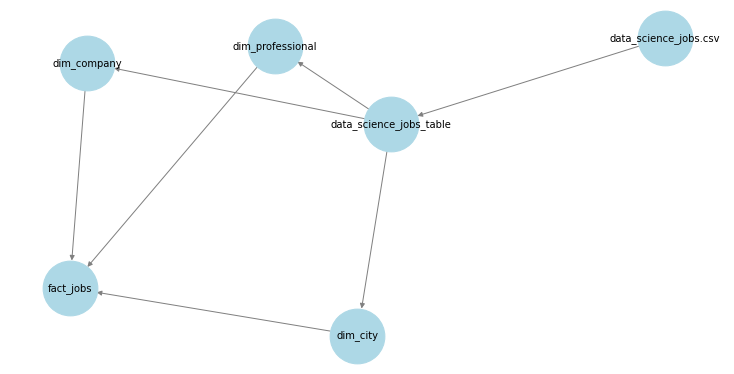

In [0]:
import networkx as nx
import matplotlib.pyplot as plt

G = nx.DiGraph()

# Adicionando as tabelas e processos ao grafo
G.add_edges_from([
    ("data_science_jobs.csv", "data_science_jobs_table"),
    ("data_science_jobs_table", "dim_professional"),
    ("data_science_jobs_table", "dim_company"),
    ("data_science_jobs_table", "dim_city"),
    ("dim_professional", "fact_jobs"),
    ("dim_company", "fact_jobs"),
    ("dim_city", "fact_jobs")
])

plt.figure(figsize=(10, 5))
nx.draw(G, with_labels=True, node_color='lightblue', edge_color='gray', node_size=3000, font_size=10)
plt.show()
